# Machine Learning

In this section, we will perform the machine learning aspect of our project which will include identifying business problem, data preprocessing, feature engineering, model building, and model tuning.

## Predicting Hockey Contracts

This problem requires two solutions utilizing machine learning techniques. <ol><li>Creating regression model to predict contract length.</li><li>Creating another regression model to predict annual salary of the contract.</li></ol>

# Predicting Contract Length

## Data Preprocesing

First, we must transform our data into machine learning format.

In [1]:
# Load data and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('../Combined Contract and Player Data/Combined_data_non_null.csv')
df.head()

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,FOW,FOL,FO%,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,337.0,289.0,53.8,Stnd (UFA),0,3,6000000,2000000,2023,7
1,6,Sebastian Aho,25.0,CAR,F,75,36,31,67,8,...,531.0,503.0,51.4,Stnd (RFA),0,1,42295000,8460250,2023,7
2,9,Alexander Alexeyev,23.0,WSH,D,32,0,5,5,-2,...,0.0,0.0,0.0,Stnd (RFA),1,2,1650000,825000,2023,5
3,17,Jaret Anderson-Dolan,23.0,LAK,C,46,7,5,12,-11,...,23.0,16.0,59.0,Stnd (UFA),0,1,775000,775000,2023,7
4,19,Rasmus Andersson,26.0,CGY,D,79,11,38,49,5,...,0.0,0.0,0.0,Stnd (RFA),1,3,27300000,4550000,2023,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rk             3040 non-null   int64  
 1   Player         3040 non-null   object 
 2   Age            3040 non-null   float64
 3   Tm             3040 non-null   object 
 4   Pos            3040 non-null   object 
 5   GP             3040 non-null   int64  
 6   G              3040 non-null   int64  
 7   A              3040 non-null   int64  
 8   PTS            3040 non-null   int64  
 9   +/-            3040 non-null   int64  
 10  PIM            3040 non-null   int64  
 11  PS             3040 non-null   float64
 12  EV             3040 non-null   int64  
 13  PP             3040 non-null   int64  
 14  SH             3040 non-null   int64  
 15  GW             3040 non-null   int64  
 16  EV.1           3040 non-null   int64  
 17  PP.1           3040 non-null   int64  
 18  SH.1    

In [4]:
df.iloc[:, 19:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S              3040 non-null   int64  
 1   S%             3040 non-null   float64
 2   TOI            3040 non-null   int64  
 3   ATOI           3040 non-null   int64  
 4   BLK            3040 non-null   float64
 5   HIT            3040 non-null   int64  
 6   FOW            3040 non-null   float64
 7   FOL            3040 non-null   float64
 8   FO%            3040 non-null   float64
 9   Contract Type  3040 non-null   object 
 10  NHL Clause     3040 non-null   int64  
 11  Term           3040 non-null   int64  
 12  Total Value    3040 non-null   int64  
 13  AAV            3040 non-null   int64  
 14  Year           3040 non-null   int64  
 15  Month          3040 non-null   int64  
dtypes: float64(5), int64(10), object(1)
memory usage: 380.1+ KB


In [5]:
# Find variables most highly correlated with Term variable
corr = df.corr(numeric_only=True)
corr['AAV'].sort_values(ascending=False)

AAV            1.000000
Total Value    0.874247
A              0.688155
PTS            0.687197
PS             0.684374
PP.1           0.627714
EV.1           0.627539
ATOI           0.622977
S              0.620934
Term           0.600315
TOI            0.566251
PP             0.561842
G              0.551588
EV             0.486105
GW             0.468695
GP             0.334917
FOW            0.211956
BLK            0.206548
Year           0.206099
S%             0.198476
FOL            0.197887
+/-            0.154976
Age            0.107214
SH.1           0.096541
Rk             0.089373
SH             0.070781
FO%            0.056631
PIM            0.025443
Month          0.021305
NHL Clause     0.017234
HIT           -0.010349
Name: AAV, dtype: float64

We will remove `Total Value` and `AAV` as these are highly correlated with our target variable and will be variables we will be predicting in our second model. Furthermore, they are knowledge we wouldn't have when making predictions for a player's future contract.

In [6]:
# Remove useless variables
df = df.drop(columns=(['Rk', 'Player', 'Total Value', 'Term']))

# y = df.Term

We will build a model with all the variables and perform feature selection afterwards

In [7]:
df['Tm'].value_counts()

Tm
TOT    288
NYI    148
WSH    138
NSH    116
BUF    110
CGY    108
TBL    102
MIN    101
PIT    101
LAK    100
DAL     99
BOS     98
EDM     94
VAN     93
TOR     92
MTL     89
COL     86
FLA     84
DET     84
NYR     84
OTT     82
PHI     78
STL     76
NJD     69
CBJ     68
SJS     66
WPG     63
CHI     62
ANA     61
CAR     60
VEG     54
ARI     54
PHX     23
SEA      7
ATL      2
Name: count, dtype: int64

In [8]:
df = pd.get_dummies(df, columns=['Tm'], drop_first=True, dtype=int)
df.head()

,Age,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,...,Tm_SEA,Tm_SJS,Tm_STL,Tm_TBL,Tm_TOR,Tm_TOT,Tm_VAN,Tm_VEG,Tm_WPG,Tm_WSH
0,31.0,C,77,14,9,23,-4,21,1.5,14,...,0,0,0,0,0,1,0,0,0,0
1,25.0,F,75,36,31,67,8,42,8.2,26,...,0,0,0,0,0,0,0,0,0,0
2,23.0,D,32,0,5,5,-2,4,0.9,0,...,0,0,0,0,0,0,0,0,0,1
3,23.0,C,46,7,5,12,-11,2,0.6,7,...,0,0,0,0,0,0,0,0,0,0
4,26.0,D,79,11,38,49,5,26,8.0,9,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df['Pos'].value_counts()

Pos
D    1121
C     955
W     940
F      24
Name: count, dtype: int64

In [10]:
df = pd.get_dummies(df, columns=['Pos'], drop_first=True, dtype=int)
df.head()

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,Tm_TBL,Tm_TOR,Tm_TOT,Tm_VAN,Tm_VEG,Tm_WPG,Tm_WSH,Pos_D,Pos_F,Pos_W
0,31.0,77,14,9,23,-4,21,1.5,14,0,...,0,0,1,0,0,0,0,0,0,0
1,25.0,75,36,31,67,8,42,8.2,26,7,...,0,0,0,0,0,0,0,0,1,0
2,23.0,32,0,5,5,-2,4,0.9,0,0,...,0,0,0,0,0,0,1,1,0,0
3,23.0,46,7,5,12,-11,2,0.6,7,0,...,0,0,0,0,0,0,0,0,0,0
4,26.0,79,11,38,49,5,26,8.0,9,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df['Contract Type'].value_counts()

Contract Type
Stnd (RFA)    1538
Stnd (UFA)    1366
35+ (UFA)      136
Name: count, dtype: int64

In [12]:
df = pd.get_dummies(df, columns=['Contract Type'], drop_first=True, dtype=int)
df.head()

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,Tm_TOT,Tm_VAN,Tm_VEG,Tm_WPG,Tm_WSH,Pos_D,Pos_F,Pos_W,Contract Type_Stnd (RFA),Contract Type_Stnd (UFA)
0,31.0,77,14,9,23,-4,21,1.5,14,0,...,1,0,0,0,0,0,0,0,0,1
1,25.0,75,36,31,67,8,42,8.2,26,7,...,0,0,0,0,0,0,1,0,1,0
2,23.0,32,0,5,5,-2,4,0.9,0,0,...,0,0,0,0,1,1,0,0,1,0
3,23.0,46,7,5,12,-11,2,0.6,7,0,...,0,0,0,0,0,0,0,0,0,1
4,26.0,79,11,38,49,5,26,8.0,9,1,...,0,0,0,0,0,1,0,0,1,0


## Initial Model building

Now that all our variables are numerical, we can begin inputting our data into a model. We still need to split the data into train and test sets and scale.

In [13]:
# shuffle the samples
df = df.sample(n = len(df), random_state = 23)
df = df.reset_index(drop = True)
df

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,Tm_TOT,Tm_VAN,Tm_VEG,Tm_WPG,Tm_WSH,Pos_D,Pos_F,Pos_W,Contract Type_Stnd (RFA),Contract Type_Stnd (UFA)
0,22.0,68,16,28,44,28,30,4.7,14,1,...,0,0,0,0,0,0,0,0,1,0
1,31.0,82,15,35,50,3,75,4.8,12,3,...,1,0,0,0,0,0,0,0,1,0
2,27.0,65,1,12,13,5,18,0.2,1,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,45,17,20,37,1,6,4.6,11,6,...,0,0,0,0,0,0,0,0,0,0
4,23.0,70,22,27,49,-22,42,4.6,20,2,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,25.0,42,1,7,8,-4,14,1.3,1,0,...,0,0,0,0,0,1,0,0,1,0
3036,29.0,82,5,42,47,-4,40,6.3,3,2,...,0,0,0,0,0,1,0,0,0,1
3037,27.0,78,22,14,36,-19,71,3.3,16,3,...,0,0,0,0,0,0,0,0,1,0
3038,29.0,24,4,10,14,-7,0,0.8,2,2,...,0,0,0,0,0,0,0,1,1,0


In [14]:
# Save 30% of the data as validation and test data
df_valid_test=df.sample(frac=0.30,random_state=23)
print('Split size: %.3f'%(len(df_valid_test)/len(df)))

Split size: 0.300


In [15]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 23)
df_valid = df_valid_test.drop(df_test.index)

In [16]:
# use the rest of the data as training data
df_train=df.drop(df_valid_test.index)

In [18]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))
    
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.AAV.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.AAV.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.AAV.values)))

Test prevalence(n = 456):2924284.936
Valid prevalence(n = 456):2962382.103
Train all prevalence(n = 2128):3102232.914


In [19]:
X_train = df_train.drop('AAV', axis=1)
y_train = df_train['AAV']
X_val = df_valid.drop('AAV', axis=1)
y_val = df_valid['AAV']

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

lr_mse = mean_squared_error(y_val, y_pred)
lr_r2 = r2_score(y_val, y_pred)

print(f'MSE: {lr_mse}')
print(f'R2: {lr_r2}')

MSE: 1634240792794.1204
R2: 0.6505189102715558


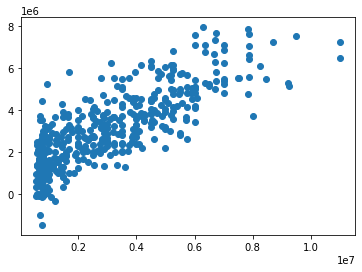

In [61]:
plt.scatter(y_val, y_pred)

### SVM

In [24]:
from sklearn.svm import SVR

svr = SVR(C=10000000)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)

In [25]:
svr_mse = mean_squared_error(y_val, y_pred)
svr_r2 = r2_score(y_val, y_pred)

print(f'MSE: {svr_mse}')
print(f'R2: {svr_r2}')
print(f'RMSE: {np.sqrt(svr_mse)}')

MSE: 1273950549323.648
R2: 0.7275666913952337
RMSE: 1128694.1788295216


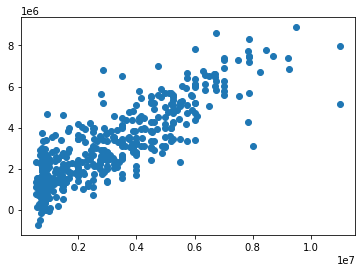

In [26]:
plt.scatter(y_val, y_pred)

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=23, )
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

In [28]:
rf_mse = mean_squared_error(y_val, y_pred)
rf_r2 = r2_score(y_val, y_pred)

print(f'MSE: {rf_mse}')
print(f'R2: {rf_r2}')

MSE: 1539335009562.9634
R2: 0.6708144362989341


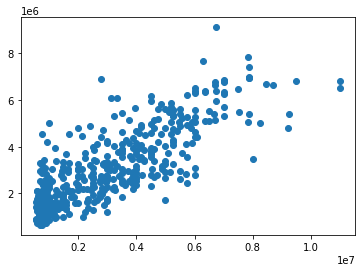

In [29]:
plt.scatter(y_val, y_pred)

### XGBoost

In [63]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_val)

In [64]:
xgbr_mse = mean_squared_error(y_val, y_pred)
xgbr_r2 = r2_score(y_val, y_pred)

print(f'MSE: {xgbr_mse}')
print(f'R2: {xgbr_r2}')

MSE: 1532392616069.9792
R2: 0.6722990616087108


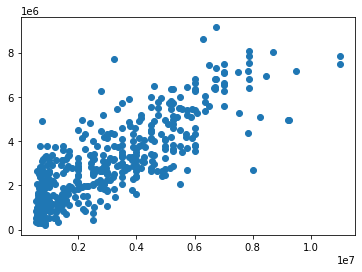

In [65]:
plt.scatter(y_val, y_pred)

### Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_val)

In [31]:
gbr_mse = mean_squared_error(y_val, y_pred)
gbr_r2 = r2_score(y_val, y_pred)

print(f'MSE: {gbr_mse}')
print(f'R2: {gbr_r2}')

MSE: 1425512847794.2017
R2: 0.6951552147849385


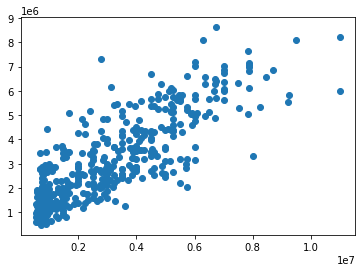

In [32]:
plt.scatter(y_val, y_pred)

In [33]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = df_train.drop(columns=['AAV']).columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

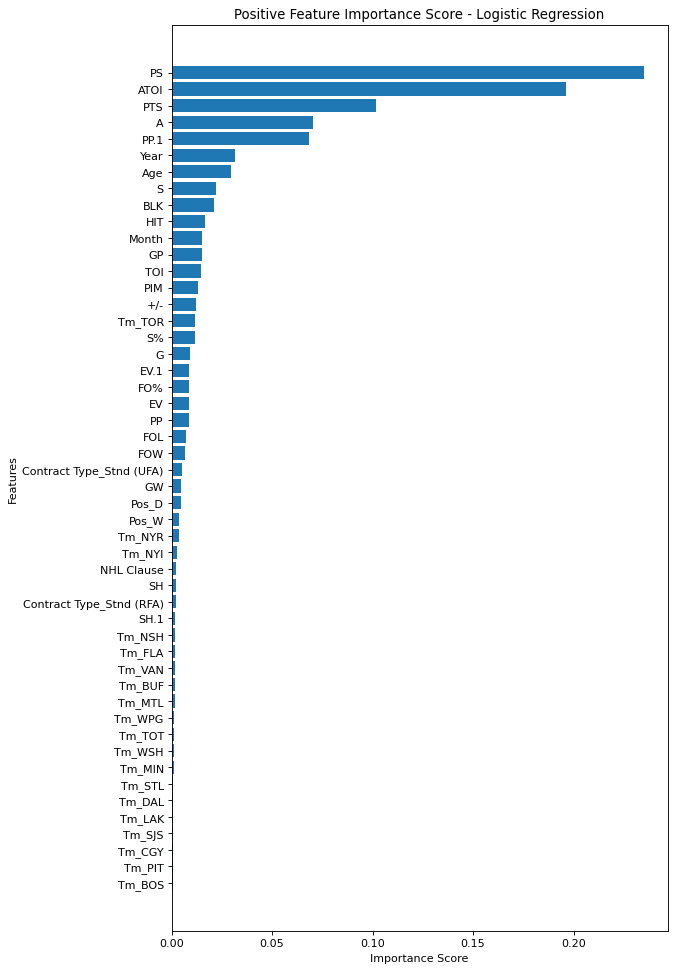

In [34]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

## Voting Regressor

In [67]:
from sklearn.ensemble import VotingRegressor

# # Create base models

y_pred_lr = lr.predict(X_val)
y_pred_rf = rf.predict(X_val)
y_pred_svr = svr.predict(X_val)
y_pred_gbr = gbr.predict(X_val)
y_pred_xgbr = gbr.predict(X_val)

# Create an ensemble model (VotingRegressor)
model = VotingRegressor([
    ('Linear Regression', lr), 
    ('Random Forest', rf),
    ('SVM', svr),
    ('Gradient Booster', gbr),
    ('XGBoost', xgbr)])

# Train the ensemble model
model.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred_ensemble = model.predict(X_val)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for individual models and ensemble
mse_lr = mean_squared_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

mse_svr = mean_squared_error(y_val, y_pred_svr)
r2_svr = r2_score(y_val, y_pred_svr)

mse_gbr = mean_squared_error(y_val, y_pred_gbr)
r2_gbr = r2_score(y_val, y_pred_gbr)

mse_xgbr = mean_squared_error(y_val, y_pred_xgbr)
r2_xgbr = r2_score(y_val, y_pred_xgbr)

mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)
r2_ensemble = r2_score(y_val, y_pred_ensemble)

# Calculate RMSE for individual models and ensemble
rmse_lr = np.sqrt(mse_lr)
rmse_rf = np.sqrt(mse_rf)
rmse_svr = np.sqrt(mse_svr)
rmse_gbr = np.sqrt(mse_gbr)
rmse_xgbr = np.sqrt(mse_xgbr)
rmse_ensemble = np.sqrt(mse_ensemble)

# Print the evaluation metrics with RMSE
print("Linear Regression RMSE:", rmse_lr)
print("Random Forest Regressor RMSE:", rmse_rf)
print("Support Vector Regressor RMSE:", rmse_svr)
print("Gradient Boosting Regressor RMSE:", rmse_gbr)
print("XGBoost Regressor RMSE:", rmse_xgbr)
print("Ensemble (Voting Regressor) RMSE:", rmse_ensemble)

# Print R-squared
print("Linear Regression R-squared:", r2_lr)
print("Random Forest Regressor R-squared:", r2_rf)
print("Support Vector Regressor R-squared:", r2_svr)
print("Gradient Boosting Regressor R-squared:", r2_gbr)
print("XGBoost Regressor R-squared:", r2_xgbr)
print("Ensemble (Voting Regressor) R-squared:", r2_ensemble)

Linear Regression RMSE: 1278374.2772733346
Random Forest Regressor RMSE: 1240699.4033862366
Support Vector Regressor RMSE: 1128694.1788295216
Gradient Boosting Regressor RMSE: 1193948.427610758
XGBoost Regressor RMSE: 1193948.427610758
Ensemble (Voting Regressor) RMSE: 1131761.9137402903
Linear Regression R-squared: 0.6505189102715558
Random Forest Regressor R-squared: 0.6708144362989341
Support Vector Regressor R-squared: 0.7275666913952337
Gradient Boosting Regressor R-squared: 0.6951552147849385
XGBoost Regressor R-squared: 0.6951552147849385
Ensemble (Voting Regressor) R-squared: 0.7260837583647692


It seems our best model performance is still with our Support vector machine model.